# *Unsupervised learning: k-means clustering*

[http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)

In [1]:
## Importing basic packages

import os
import random
import numpy as np

In [2]:
%%capture
## Downloading several hundred New York Times articles as text files

os.chdir('/sharedfolder/')

!wget -N https://github.com/pcda17/pcda17.github.io/raw/master/week/10/nyt_articles_11-9-2017.zip
!unzip -o nyt_articles_11-9-2017.zip

In [3]:
## Loading all text files in the current directory as a list of strings

os.chdir('/sharedfolder/nyt_articles_11-9-2017/')

document_list = []

for filename in [item for item in os.listdir('./') if '.txt' in item]: # Excluding files other than .txt with a list comprehension
    text_data = open(filename).read()
    document_list.append(text_data)

print(len(document_list)) # Printing number of documents in list

random.choice(document_list) # Viewing a single document chosen at random

451


"The case of Mr. Kelley shows one of the system’s biggest problems: a simple failure to forward records. At the Pentagon this week, the military services were scrambling to examine whether they had been reporting the convictions of military personnel of crimes like assault to the Federal Bureau of Investigation, which maintains the three databases that make up the system.  Defense Secretary Jim Mattis asked the Pentagon’s inspector general’s office to investigate the Air Force’s failure to report Mr. Kelley’s conviction. Mr. Mattis, traveling in Helsinki, Finland, said that the inspector general needed to “define what the problem is.”  The problem dates back decades. In 1996, the inspector general found that the Army, Navy and Air Force were failing to report the vast majority of convictions to the F.B.I.  Federal agencies, unlike state and local ones, are required by law to report criminal records to the F.B.I. But in 2014, the inspector general found that the Defense Department still

In [4]:
## Creating stop word list

from nltk.corpus import stopwords
import string

stop_words = stopwords.words('english') + ["'s", "'re", '”', '“', '’', '—'] + list(string.punctuation)

stop_words[:10]     ## Viewing first 10 stop words

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your']

In [5]:
## Tokenizing, stemming, and removing stop words from our list of documents

from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer

stemmer = PorterStemmer()

documents_filtered = []

for document in document_list:
    token_list = word_tokenize(document.lower())                                 ## Tokenizing
    tokens_filtered = [item for item in token_list if (item not in stop_words)]  ## Removing stop words
    tokens_filtered = [stemmer.stem(item) for item in tokens_filtered]           ## Stemming
    documents_filtered.append(' '.join(tokens_filtered))

In [6]:
## Viewing a preprocessed document

random.choice(documents_filtered)

'friday 1 2 p.m. latin rhythm el barrio stretch north east 96th street harlem river heart commerci strip east 116th street la marqueta revit histor market railroad track park avenu first avenu casa latina music shop beckon latin rhythm blare loudspeak neighborhood 50 year store own coupl vicent cristina barreiro spanish argentin surviv gentrif music download eclect mix sound salsa reggaeton vintag ballad also sell collect book percuss instrument like bongo cowbel 2 2:30 p.m. mural comfort food far away 168 east 116th street cuchifrito entic aroma puerto rican fritter like alcapurria green banana dough fill ground beef 1.50 caribbean comfort food includ pork shoulder rice pigeon pea 8 seat limit counter stool pick snack sidewalk window keep walk munch along 116th street first second avenu mosaic portrait puerto rican educ presidenti medal freedom recipi antonia pantoja founder educ youth organ aspira frame entranc senior center corsi hous public-h project piec sampl multimedia artist ma

In [7]:
## Vectorizing preprocessed documents

from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()

X = vectorizer.fit_transform(documents_filtered) 

In [8]:
## Creating a vocabulary list corresponding to the vectors we created above

vocabulary = vectorizer.get_feature_names()

vocabulary[1140:1160]

['amort',
 'amount',
 'amped',
 'ampl',
 'amplif',
 'amplifi',
 'ampush',
 'amsterdam',
 'amtrak',
 'amulet',
 'amus',
 'ana',
 'anab',
 'anal',
 'analog',
 'analogu',
 'analys',
 'analysi',
 'analyst',
 'analyt']

In [9]:
## Clustering documents

from sklearn.cluster import KMeans

kmeans_classifier = KMeans(n_clusters=8, init='k-means++', n_init=10, max_iter=500, algorithm='auto')
                                   ## ^ docuements to be grouped in 8 clusters 

cluster_classes = kmeans_classifier.fit_predict(X) 

cluster_classes[:20]               ## Viewing first 20 cluster assignments

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [10]:
## Our cluster assignments and document lists are the same size, in the same order.

print(len(cluster_classes))

print(len(documents_filtered))

print(len(document_list))

451
451
451


In [11]:
## We can view a document and its assigned cluster by accessing the same index in both lists

index_num = 130

print('Cluster assignment:')
print(cluster_classes[index_num])
print()
print('Document:')
print(document_list[index_num])

Cluster assignment:
1

Document:
“The one thing that I never wanted for him was to feel any type of racism where he felt like he was being targeted simply because he’s an African-American male,” Ms. Carr said.  It is unclear who took the video, which appears to have been recorded with a phone, and when. Ms. Carr said her daughter brought it to her attention on Nov. 2.  Ms. Carr asked that her son’s name not be published because he is a minor and “not the type of kid that really likes a lot of attention.” She said he told her that he had been laughing with some friends during a physics lesson, and that the teacher had gotten frustrated.  “I believe that he did like his teacher, and he believed that his teacher liked him,” she said, adding that Mr. Hagan apologized to her son.  Mr. Hagan did not respond to phone calls or an email seeking comment on Wednesday.  Ms. Carr said she contacted the Rockdale County Sheriff’s Department. A spokesman for the department said on Tuesday that a repor

In [12]:
## Write each document to a new text file, with each cluster of documents in its own directory

try: os.mkdir('/sharedfolder/nyt_clusters_11-9-2017/')
except: pass

for i in range(len(documents_filtered)):
    
    out_dir = '/sharedfolder/nyt_clusters_11-9-2017/Cluster_' + str(cluster_classes[i])  ## Creating a directory pathname that
                                                                                         ## includes the assigned cluster number.
    try: os.mkdir(out_dir)  ## Creating the out_dir directory if it does not yet exist
    except: pass
    
    os.chdir(out_dir)
    
    out_filename = 'Document_' + str(i) + '.txt'    ## Creating a filename for the text file
    
    with open(out_filename, 'w') as file_out:
        file_out.write(document_list[i])            ## Writing text from original (non-preprocessed) document list


In [13]:
## Classifying a new text into an existing cluster

input_vector = vectorizer.transform(['Even the budget office is revising its estimates and has predicted the new numbers would be smaller.'])

kmeans_classifier.predict(input_vector)

array([1], dtype=int32)

## *Scatter Plots*

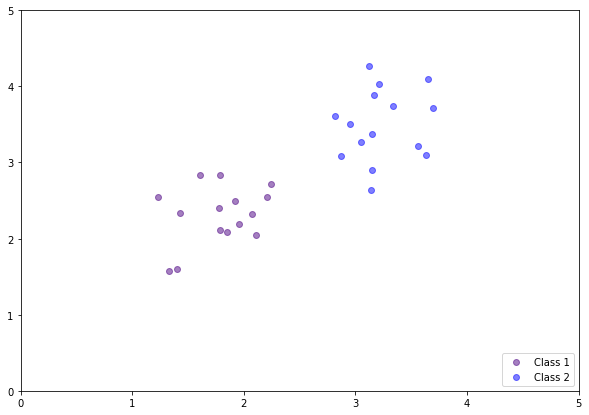

In [14]:
## A simple scatter plot example

import random
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = (10, 7)  # Setting default plot size

x_vals_1 = [1.92, 1.79, 1.96, 1.4, 1.61, 1.23, 1.43, 1.85, 2.07, 2.24, 2.11, 1.78, 2.21, 1.79, 1.33]
y_vals_1 = [2.5, 2.11, 2.19, 1.6, 2.83, 2.55, 2.33, 2.09, 2.32, 2.72, 2.05, 2.4, 2.55, 2.83, 1.58]

x_vals_2 = [3.63, 3.12, 3.21, 3.15, 3.56, 3.17, 3.05, 3.14, 2.87, 3.65, 2.82, 3.34, 3.7, 2.95, 3.15]
y_vals_2 = [3.1, 4.27, 4.03, 3.37, 3.22, 3.89, 3.27, 2.64, 3.09, 4.1, 3.61, 3.74, 3.71, 3.51, 2.9]


plt.scatter(x_vals_1, y_vals_1, label='Class 1', c='indigo', alpha=0.5)

plt.scatter(x_vals_2, y_vals_2, label='Class 2', c='blue', alpha=0.5)

plt.ylim(ymin=0, ymax=5)
plt.xlim(xmin=0, xmax=5)

plt.legend(loc=4)

plt.show()

/usr/local/lib/python3.5/dist-packages/sklearn/discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


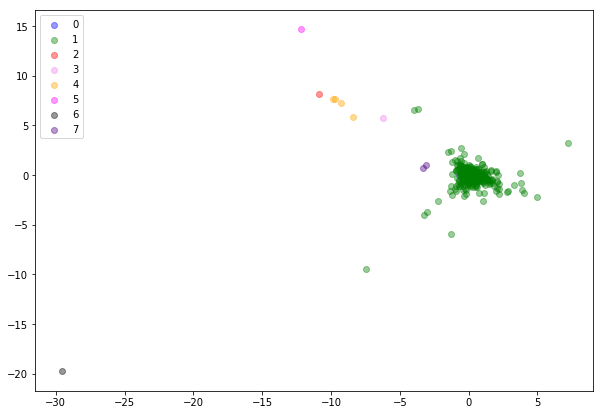

In [15]:
## Projecting all vectors to 2 dimensions using linear discriminant analysis (LDA) and viewing a scatter plot

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = (10, 7)  # Setting default plot size

lda = LDA(n_components=2) #2-dimensional LDA

y = cluster_classes

lda_transformed = pd.DataFrame(lda.fit_transform(X.toarray(), y))

lda_transformed['y'] = y

plt.scatter(lda_transformed[lda_transformed['y']==0][0], lda_transformed[lda_transformed['y']==0][1], label='0', c='blue', alpha=0.4)
plt.scatter(lda_transformed[lda_transformed['y']==1][0], lda_transformed[lda_transformed['y']==1][1], label='1', c='green', alpha=0.4)
plt.scatter(lda_transformed[lda_transformed['y']==2][0], lda_transformed[lda_transformed['y']==2][1], label='2', c='red', alpha=0.4)
plt.scatter(lda_transformed[lda_transformed['y']==3][0], lda_transformed[lda_transformed['y']==3][1], label='3', c='violet', alpha=0.4)
plt.scatter(lda_transformed[lda_transformed['y']==4][0], lda_transformed[lda_transformed['y']==4][1], label='4', c='orange', alpha=0.4)
plt.scatter(lda_transformed[lda_transformed['y']==5][0], lda_transformed[lda_transformed['y']==5][1], label='5', c='magenta', alpha=0.4)
plt.scatter(lda_transformed[lda_transformed['y']==6][0], lda_transformed[lda_transformed['y']==6][1], label='6', c='black', alpha=0.4)
plt.scatter(lda_transformed[lda_transformed['y']==7][0], lda_transformed[lda_transformed['y']==7][1], label='7', c='indigo', alpha=0.4)

plt.legend(loc=2)

plt.show()

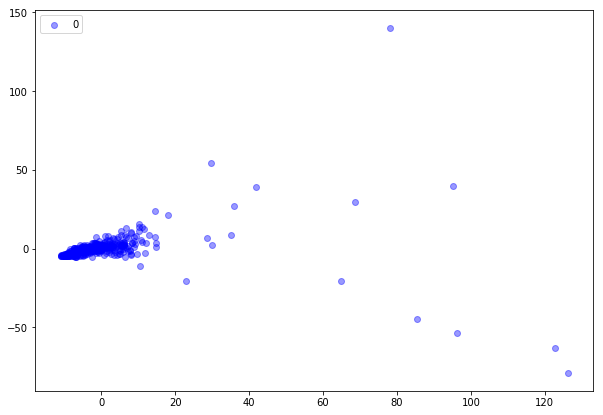

In [16]:
## Projecting all vectors to 2 dimensions using principal component analysis (PCA) and viewing a scatter plot

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = (10, 7)  # Setting default plot size

pca = PCA(n_components=2) #2-dimensional LDA

pca_transformed = pca.fit_transform(X.toarray())

plt.scatter([pair[0] for pair in pca_transformed], [pair[1] for pair in pca_transformed], label='0', c='blue', alpha=0.4)

plt.legend(loc=2)

plt.show()

### *Clustering in topic space*

In [17]:
%%capture
!pip3 install lda

In [18]:
import lda

model = lda.LDA(n_topics=10, n_iter=1000, random_state=1)

model.fit(X)

INFO:lda:n_documents: 451
INFO:lda:vocab_size: 18084
INFO:lda:n_words: 215533
INFO:lda:n_topics: 10
INFO:lda:n_iter: 1000
INFO:lda:<0> log likelihood: -2458339
INFO:lda:<10> log likelihood: -2025238
INFO:lda:<20> log likelihood: -1955128
INFO:lda:<30> log likelihood: -1929633
INFO:lda:<40> log likelihood: -1915600
INFO:lda:<50> log likelihood: -1907004
INFO:lda:<60> log likelihood: -1900932
INFO:lda:<70> log likelihood: -1896147
INFO:lda:<80> log likelihood: -1892016
INFO:lda:<90> log likelihood: -1889082
INFO:lda:<100> log likelihood: -1886673
INFO:lda:<110> log likelihood: -1884329
INFO:lda:<120> log likelihood: -1882191
INFO:lda:<130> log likelihood: -1880183
INFO:lda:<140> log likelihood: -1878238
INFO:lda:<150> log likelihood: -1876631
INFO:lda:<160> log likelihood: -1876320
INFO:lda:<170> log likelihood: -1875241
INFO:lda:<180> log likelihood: -1874734
INFO:lda:<190> log likelihood: -1872742
INFO:lda:<200> log likelihood: -1872311
INFO:lda:<210> log likelihood: -1870936
INFO:lda:

In [19]:
topic_features = model.doc_topic_

print(len(topic_features))

topic_features[:2]

451


array([[  3.94230769e-02,   5.86538462e-02,   9.61538462e-04,
          3.95192308e-01,   9.61538462e-04,   1.64423077e-01,
          9.61538462e-04,   9.61538462e-04,   3.37500000e-01,
          9.61538462e-04],
       [  6.92033543e-01,   2.09643606e-04,   1.48846960e-02,
          3.37526205e-02,   2.30607966e-03,   7.77777778e-02,
          1.67924528e-01,   8.59538784e-03,   2.09643606e-04,
          2.30607966e-03]])

In [20]:
## Clustering documents using topic vectors (instead of vocabulary vectors, which we used above)

from sklearn.cluster import KMeans

kmeans_topic_classifier = KMeans(n_clusters=10, init='k-means++', n_init=10, max_iter=500, algorithm='auto')
                                         ## ^ docuements to be grouped in 8 clusters 

topic_cluster_classes = kmeans_classifier.fit_predict(topic_features) 

print(len(topic_cluster_classes))

topic_cluster_classes[:20]               ## Viewing first 20 cluster assignments

451


array([0, 4, 3, 7, 1, 2, 7, 2, 3, 0, 4, 6, 6, 1, 5, 1, 7, 7, 6, 3], dtype=int32)

In [21]:
## Write each document to a new text file, with each cluster of documents in its own directory

try: os.mkdir('/sharedfolder/nyt_topic_clusters_11-9-2017/')
except: pass

for i in range(len(documents_filtered)):
    
    out_dir = '/sharedfolder/nyt_topic_clusters_11-9-2017/Cluster_' + str(topic_cluster_classes[i])  ## Creating a directory pathname that
                                                                                         ## includes the assigned cluster number.
    try: os.mkdir(out_dir)  ## Creating the out_dir directory if it does not yet exist
    except: pass
    
    os.chdir(out_dir)
    
    out_filename = 'Document_' + str(i) + '.txt'    ## Creating a filename for the text file
    
    with open(out_filename, 'w') as file_out:
        file_out.write(document_list[i])            ## Writing text from original (non-preprocessed) document list


/usr/local/lib/python3.5/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


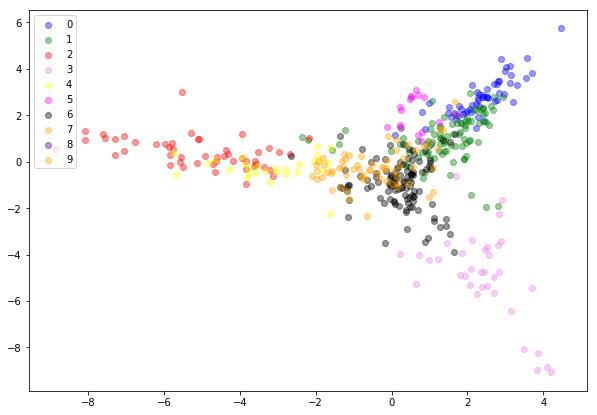

In [22]:
## Projecting all topic vectors to 2 dimensions using linear discriminant analysis (LDA) and viewing a scatter plot

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = (10, 7)  # Setting default plot size

lda = LDA(n_components=2) #2-dimensional LDA

y = topic_cluster_classes

lda_transformed = pd.DataFrame(lda.fit_transform(topic_features, y))

lda_transformed['y'] = y

plt.scatter(lda_transformed[lda_transformed['y']==0][0], lda_transformed[lda_transformed['y']==0][1], label='0', c='blue', alpha=0.4)
plt.scatter(lda_transformed[lda_transformed['y']==1][0], lda_transformed[lda_transformed['y']==1][1], label='1', c='green', alpha=0.4)
plt.scatter(lda_transformed[lda_transformed['y']==2][0], lda_transformed[lda_transformed['y']==2][1], label='2', c='red', alpha=0.4)
plt.scatter(lda_transformed[lda_transformed['y']==3][0], lda_transformed[lda_transformed['y']==3][1], label='3', c='violet', alpha=0.4)
plt.scatter(lda_transformed[lda_transformed['y']==4][0], lda_transformed[lda_transformed['y']==4][1], label='4', c='yellow', alpha=0.4)
plt.scatter(lda_transformed[lda_transformed['y']==5][0], lda_transformed[lda_transformed['y']==5][1], label='5', c='magenta', alpha=0.4)
plt.scatter(lda_transformed[lda_transformed['y']==6][0], lda_transformed[lda_transformed['y']==6][1], label='6', c='black', alpha=0.4)
plt.scatter(lda_transformed[lda_transformed['y']==7][0], lda_transformed[lda_transformed['y']==7][1], label='7', c='orange', alpha=0.4)
plt.scatter(lda_transformed[lda_transformed['y']==8][0], lda_transformed[lda_transformed['y']==8][1], label='8', c='indigo', alpha=0.4)
plt.scatter(lda_transformed[lda_transformed['y']==9][0], lda_transformed[lda_transformed['y']==9][1], label='9', c='orange', alpha=0.4)

plt.legend(loc=2)

plt.show()